# Installation of Pandas and Ucimlrepo

In [6]:
#!pip install pandas
#!pip install ucimlrepo
#%pip install matplotlib


In [7]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 
import numpy as np
import math
import matplotlib.pyplot as plt
import string

# Breast Cancer 

# Train Breast Cancer Logistic Regression

Iteration 0: Log-Likelihood = -315.3819671547758, w0 = -0.515, w1 = 1.638144731774864, w2 = 0.847580407728337, w3 = 1.0248454784799919
Iteration 100: Log-Likelihood = -394.1589899710619, w0 = -0.725243799026566, w1 = 5.477409785419577, w2 = 1.3922808074587518, w3 = 1.1877441366857235
Iteration 200: Log-Likelihood = -396.99707920777723, w0 = -0.731595278840778, w1 = 5.752002730395085, w2 = 1.4204383414353103, w3 = 1.2026170092051796
Iteration 300: Log-Likelihood = -397.5220433831307, w0 = -0.7327357603607623, w1 = 5.7986577192270286, w2 = 1.4251835998255074, w3 = 1.2051219598908924
Iteration 400: Log-Likelihood = -397.618282401049, w0 = -0.7329439143561562, w1 = 5.807094087254809, w2 = 1.4260404715179815, w3 = 1.2055742294252312
Iteration 500: Log-Likelihood = -397.6359124222503, w0 = -0.7329820161801984, w1 = 5.808635744316136, w2 = 1.426197016553021, w3 = 1.2056568541439598
Iteration 600: Log-Likelihood = -397.63914171008236, w0 = -0.73298899428815, w1 = 5.808918002521341, w2 = 1.4262

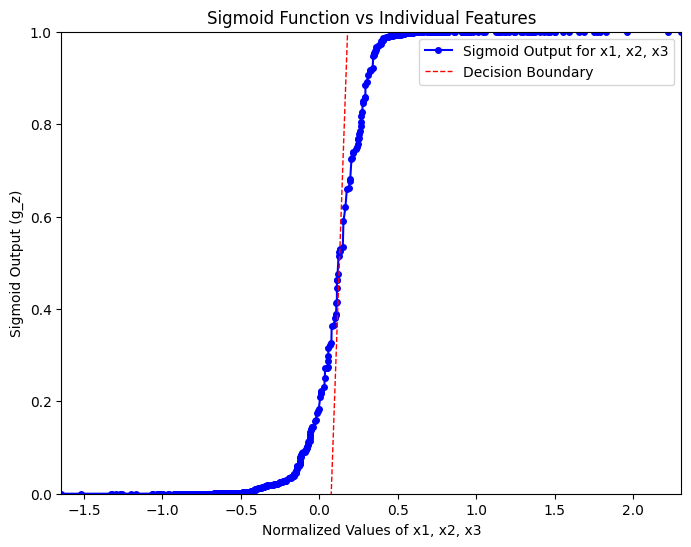

In [2]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 
import numpy as np
import math
import matplotlib.pyplot as plt
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
z = breast_cancer_wisconsin_diagnostic.targets
# metadata 
#print(breast_cancer_wisconsin_diagnostic.metadata)  -I have commented this out because it is not needed for this task
# variable information 
#print(breast_cancer_wisconsin_diagnostic.variables) -I have commented this out because it is not needed for this task

# 1) Identify the attributes and target variables
#print("1 Identify the attributes and target variables")
#print(X) #my attributes [569 rows x 30 columns]
#print(y) #my target variable [569 rows x 1 columns]

# 2) Place the target variable column as the last comlumn of your data file
#print("2 Place the target variable column as the last comlumn of your data file")
data = pd.DataFrame(data=X, columns=z)
data['Diagnosis'] = y #use the target variable as the last column by using the data['Diagnosis'] = y.
#print(data)

#3) Create a function that will split the dataset in any desired proportion when given a data set. i.e. 20% testing, 80% training. Your split must select instances distributed throughout your dataset at random.
#print("3 Create a function that will split the dataset in any desired proportion when given a data set. i.e. 20% testing, 80% training. Your split must select instances distributed throughout your dataset at random.")
def split_data(data, test_size): #define the function split_data with the parameters data and test_size that will be used to split the data. data is the dataset and test_size is the proportion of the data that will be used for testing.
    data = data.sample(frac=1) #shuffle the data. frac=1 means that the entire data set will be shuffled. data.sample() is used to shuffle the data by using the frac parameter. the frac parameter is used to specify the fraction of the data that will be returned. 
    train_data = data.iloc[:int(len(data)*(1-test_size))] #train_data is the training data set. data.iloc[] is used to select the data from the data set. data.iloc[:int(len(data)*(1-test_size))] is used to select the data from the beginning of the data set to the end of the data set multiplied by 1 minus the test_size.
    test_data = data.iloc[int(len(data)*(1-test_size)):] #test_data is the testing data set. data.iloc[] is used to select the data from the data set. data.iloc[int(len(data)*(1-test_size)):] is used to select the data from the end of the data set multiplied by 1 minus the test_size to the end of the data set. .iloc[:int(len(data)*(1-test_size))] is used to select the data from the beginning of the data set to the end of the data set multiplied by 1 minus the test_size.
    return train_data, test_data #return the training and testing data sets. this will return the training and testing data sets that were created in the previous two lines. we are returning the training and testing data sets so that we can use them later on in the code.

train_data, test_data = split_data(data, 0.2) #call the split_data function with the data set and the test_size as the parameters. the test_size is 0.2 which means that 20% of the data will be used for testing and 80% of the data will be used for training. the training and testing data sets will be stored in the variables train_data and test_data.
#print("Training Set:")
#print(train_data)
#print("\nTesting Set:")
#print(test_data)

#4) Perform Logistic Regression on the training data set using the sigmoid function. Optimize for each feature separately. Plot the sigmoid function for each feature.
# Assuming train_data is already defined and contains the necessary columns
x1_train = train_data['radius1'].values  # Save x1 values in array x1_train.
x2_train = train_data['symmetry3'].values  # Save x2 values in array x2_train.
x3_train = train_data['texture3'].values  # Save x3 values in array x3_train.
target = np.where(train_data['Diagnosis'].values == 'M', 1, 0)  # Convert 'M' -> 1 and 'B' -> 0

# Normalize each feature
x1_normalized = (x1_train - np.mean(x1_train)) / np.std(x1_train)  # Normalize x1 values. np.mean() is used to calculate the mean of the x1 values and np.std() is used to calculate the standard deviation of the x1 values. the x1 values are then normalized by subtracting the mean and dividing by the standard deviation.
x2_normalized = (x2_train - np.mean(x2_train)) / np.std(x2_train)  # Normalize x2 values
x3_normalized = (x3_train - np.mean(x3_train)) / np.std(x3_train)  # Normalize x3 values

normalized_combined = (x1_normalized + x2_normalized+x3_normalized)/3

#Logistic regression function (optimize for each feature separately)
def logistic_regression(x1_data, x2_data, x3_data, target, iterations=2000, lr=0.01):
    w0 = 0.0  # Initialize weights
    w1 = 0.0
    w2 = 0.0
    w3 = 0.0
    for i in range(iterations):
        # Compute the log-likelihood
        log_likelihood = sum(target * (w0 + w1 * x1_data + (w2**2)*x2_data + (w3**3)*x3_data) - np.log(1 + np.exp(-(w0 + w1 * x1_data + (w2**2)*x2_data + (w3**3)*x3_data))))
        
        # Gradient with respect to w0 and w1
        G0 = sum((target - 1 / (1 + np.exp(-(w0 + w1 * x1_data + (w2**2)*x2_data + (w3**3)*x3_data)))) * 1)   # Gradient with respect to w0
        G1 = sum((target - 1 / (1 + np.exp(-(w0 + w1 * x1_data + (w2**2)*x2_data + (w3**3)*x3_data)))) * x1_data)  # Gradient with respect to w1
        G2 = sum((target - 1 / (1 + np.exp(-(w0 + w1 * x1_data + (w2**2)*x2_data + (w3**3)*x3_data)))) * x2_data)  # Gradient with respect to w2
        G3 = sum((target - 1 / (1 + np.exp(-(w0 + w1 * x1_data + (w2**2)*x2_data + (w3**3)*x3_data)))) * x3_data)  # Gradient with respect to w3
        
        # Update the weights using the learning rate
        w0 += lr * G0  # Update w0
        w1 += lr * G1  # Update w1
        w2 += lr * G2  # Update w2
        w3 += lr * G3  # Update w3

        # Optionally print progress
        if i % 100 == 0:
            print(f"Iteration {i}: Log-Likelihood = {log_likelihood}, w0 = {w0}, w1 = {w1}, w2 = {w2}, w3 = {w3}")

    # Compute the sigmoid function using the optimized weights
    g_z = 1 / (1 + np.exp(-(w0 + w1 * x1_data + (w2**2)*x2_data + (w3**3)*x3_data)))
    return g_z, w0, w1, w2, w3  # Return the sigmoid function and the optimized weights

# Optimize for x1 training data feature separately
g_z_x, w0_x0, w1_x1, w2_x2, w3_x3 = logistic_regression(x1_normalized, x2_normalized, x3_normalized, target) # get g_Z, w0 and w1 for x1_normalized, and the target variables input into logistic regression function

print ("Optimized w0:", w0_x0, 'size:', w0_x0.size)
print ("Optimized w1:", w1_x1, 'size:', w1_x1.size)
print ("Optimized w2:", w2_x2, 'size:', w2_x2.size)
print ("Optimized w3:", w3_x3, 'size:', w3_x3.size)
print ("Optimized g_z:", g_z_x, 'size:', g_z_x.size)
#print ("Optimized loglikelihook:", log_likelihood, 'size:', log_likelihood.size)

#-----------------------------------------------------------------------
# Plot the sigmoid function for each feature
plt.figure(figsize=(8, 6))

# Plot the sigmoid output for normalized combined features
plt.plot(np.sort(normalized_combined), np.sort(g_z_x), label='Sigmoid Output for x1, x2, x3', color='blue', marker='o', linestyle='-', markersize=4)

# Decision boundary, scaled and adjusted to avoid overpowering the plot
x_values = np.linspace(min(normalized_combined), max(normalized_combined), len(normalized_combined))
x1_values = np.linspace(min(normalized_combined), max(normalized_combined), len(x1_normalized))
x2_values = np.linspace(min(normalized_combined), max(normalized_combined), len(x2_normalized))
x3_values = np.linspace(min(normalized_combined), max(normalized_combined), len(x3_normalized))

decision_boundary = w0_x0 + w1_x1 * x1_values + (w2_x2**2) * x2_values + (w3_x3**3) * x3_values

# Plot the decision boundary with a smaller line width and limited range
plt.plot(x_values, decision_boundary, color='red', linestyle='--', linewidth=1, label='Decision Boundary')

# Adding labels and title
plt.xlabel('Normalized Values of x1, x2, x3')
plt.ylabel('Sigmoid Output (g_z)')
plt.title('Sigmoid Function vs Individual Features')

# Adjusting axis limits to prevent overpowering
plt.xlim(min(x_values), max(x_values))
plt.ylim(0, 1)  # Sigmoid output is between 0 and 1, so we limit the y-axis accordingly

plt.legend()

# Show plot
plt.show()



# Test Breast Cancer Logistic Regression

3 Create a function that will split the dataset in any desired proportion when given a data set. i.e. 20% testing, 80% training. Your split must select instances distributed throughout your dataset at random.
Training Set:

Testing Set:
Iteration 0: Log-Likelihood = -79.01877858383385, w0 = -0.12, w1 = 0.3960069097275891, w2 = 0.2670329406775103, w3 = 0.2515475231309843
Iteration 100: Log-Likelihood = -82.55206069067988, w0 = -0.6242773407041324, w1 = 4.564272491289229, w2 = 1.492141250718948, w3 = 1.1911969518057404
Iteration 200: Log-Likelihood = -74.98143125919582, w0 = -0.5755568725850952, w1 = 5.927371392731523, w2 = 1.6108830702395067, w3 = 1.2661716155639247
Iteration 300: Log-Likelihood = -70.22054044661671, w0 = -0.5415288641196011, w1 = 6.839117152186894, w2 = 1.6858853995592522, w3 = 1.311779589450794
Iteration 400: Log-Likelihood = -66.42694617362312, w0 = -0.5126899381093684, w1 = 7.532804136944941, w2 = 1.7404582734494354, w3 = 1.3440377902374883
Iteration 500: Log-Likeli

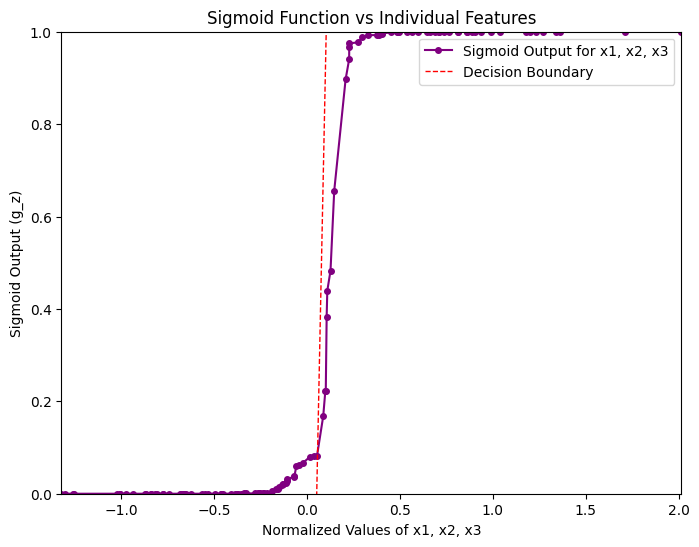

In [71]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 
import numpy as np
import math
import matplotlib.pyplot as plt
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
z = breast_cancer_wisconsin_diagnostic.targets
# metadata 
#print(breast_cancer_wisconsin_diagnostic.metadata)  -I have commented this out because it is not needed for this task
# variable information 
#print(breast_cancer_wisconsin_diagnostic.variables) -I have commented this out because it is not needed for this task

# 1) Identify the attributes and target variables
#print("1 Identify the attributes and target variables")
#print(X) #my attributes [569 rows x 30 columns]
#print(y) #my target variable [569 rows x 1 columns]

# 2) Place the target variable column as the last comlumn of your data file
#print("2 Place the target variable column as the last comlumn of your data file")
data = pd.DataFrame(data=X, columns=z)
data['Diagnosis'] = y #use the target variable as the last column by using the data['Diagnosis'] = y.
#print(data)

#3) Create a function that will split the dataset in any desired proportion when given a data set. i.e. 20% testing, 80% training. Your split must select instances distributed throughout your dataset at random.
print("3 Create a function that will split the dataset in any desired proportion when given a data set. i.e. 20% testing, 80% training. Your split must select instances distributed throughout your dataset at random.")
def split_data(data, test_size): #define the function split_data with the parameters data and test_size that will be used to split the data. data is the dataset and test_size is the proportion of the data that will be used for testing.
    data = data.sample(frac=1) #shuffle the data. frac=1 means that the entire data set will be shuffled. data.sample() is used to shuffle the data by using the frac parameter. the frac parameter is used to specify the fraction of the data that will be returned. 
    train_data = data.iloc[:int(len(data)*(1-test_size))] #train_data is the training data set. data.iloc[] is used to select the data from the data set. data.iloc[:int(len(data)*(1-test_size))] is used to select the data from the beginning of the data set to the end of the data set multiplied by 1 minus the test_size.
    test_data = data.iloc[int(len(data)*(1-test_size)):] #test_data is the testing data set. data.iloc[] is used to select the data from the data set. data.iloc[int(len(data)*(1-test_size)):] is used to select the data from the end of the data set multiplied by 1 minus the test_size to the end of the data set. .iloc[:int(len(data)*(1-test_size))] is used to select the data from the beginning of the data set to the end of the data set multiplied by 1 minus the test_size.
    return train_data, test_data #return the training and testing data sets. this will return the training and testing data sets that were created in the previous two lines. we are returning the training and testing data sets so that we can use them later on in the code.

train_data, test_data = split_data(data, 0.2) #call the split_data function with the data set and the test_size as the parameters. the test_size is 0.2 which means that 20% of the data will be used for testing and 80% of the data will be used for training. the training and testing data sets will be stored in the variables train_data and test_data.
print("Training Set:")
#print(train_data)
print("\nTesting Set:")
#print(test_data)

#4) Perform Logistic Regression on the test data set using the sigmoid function. Optimize for each feature separately. Plot the sigmoid function for each feature.
# Assuming train_data is already defined and contains the necessary columns
x1_test = test_data['radius1'].values  # Save x1 values in array x1_train.
x2_test = test_data['symmetry3'].values  # Save x2 values in array x2_train.
x3_test= test_data['texture3'].values  # Save x3 values in array x3_train.
target = np.where(test_data['Diagnosis'].values == 'M', 1, 0)  # Convert 'M' -> 1 and 'B' -> 0

# Normalize each feature
x1_normalized = (x1_test - np.mean(x1_test)) / np.std(x1_test)  # Normalize x1 values. np.mean() is used to calculate the mean of the x1 values and np.std() is used to calculate the standard deviation of the x1 values. the x1 values are then normalized by subtracting the mean and dividing by the standard deviation.
x2_normalized = (x2_test - np.mean(x2_test)) / np.std(x2_test)  # Normalize x2 values
x3_normalized = (x3_test - np.mean(x3_test)) / np.std(x3_test)  # Normalize x3 values

normalized_combined = (x1_normalized + x2_normalized + x3_normalized)/3

#Logistic regression function (optimize for each feature separately)
def logistic_regression(x1_data, x2_data, x3_data, target, iterations=2000, lr=0.01):
    w0 = 0.0  # Initialize weights
    w1 = 0.0
    w2 = 0.0
    w3 = 0.0
    for i in range(iterations):
        # Compute the log-likelihood
        log_likelihood = sum(target * (w0 + w1 * x1_data + (w2**2)*x2_data + (w3**3)*x3_data) - np.log(1 + np.exp(-(w0 + w1 * x1_data + (w2**2)*x2_data + (w3**3)*x3_data))))
        
        # Gradient with respect to w0 and w1
        G0 = sum((target - 1 / (1 + np.exp(-(w0 + w1 * x1_data + (w2**2)*x2_data + (w3**3)*x3_data)))) * 1)   # Gradient with respect to w0
        G1 = sum((target - 1 / (1 + np.exp(-(w0 + w1 * x1_data + (w2**2)*x2_data + (w3**3)*x3_data)))) * x1_data)  # Gradient with respect to w1
        G2 = sum((target - 1 / (1 + np.exp(-(w0 + w1 * x1_data + (w2**2)*x2_data + (w3**3)*x3_data)))) * x2_data)  # Gradient with respect to w2
        G3 = sum((target - 1 / (1 + np.exp(-(w0 + w1 * x1_data + (w2**2)*x2_data + (w3**3)*x3_data)))) * x3_data)  # Gradient with respect to w3
        
        # Update the weights using the learning rate
        w0 += lr * G0  # Update w0
        w1 += lr * G1  # Update w1
        w2 += lr * G2  # Update w2
        w3 += lr * G3  # Update w3

        # Optionally print progress
        if i % 100 == 0:
            print(f"Iteration {i}: Log-Likelihood = {log_likelihood}, w0 = {w0}, w1 = {w1}, w2 = {w2}, w3 = {w3}")

    # Compute the sigmoid function using the optimized weights
    g_z = 1 / (1 + np.exp(-(w0 + w1 * x1_data + (w2**2)*x2_data + (w3**3)*x3_data)))
    return g_z, w0, w1, w2, w3  # Return the sigmoid function and the optimized weights

# Optimize for x1 training data feature separately
g_z_x, w0_x1, w1_x1, w2_x2, w3_x3 = logistic_regression(x1_normalized, x2_normalized, x3_normalized, target) # get g_Z, w0 and w1 for x1_normalized, and the target variables input into logistic regression function

print ("Optimized w0:", w0_x1, 'size:', w0_x1.size)
print ("Optimized w1:", w1_x1, 'size:', w1_x1.size)
print ("Optimized w2:", w2_x2, 'size:', w2_x2.size)
print ("Optimized w3:", w3_x3, 'size:', w3_x3.size)


#-----------------------------------------------------------------------
# Plot the sigmoid function for each feature
plt.figure(figsize=(8, 6))

# Plot the sigmoid output for normalized combined features
plt.plot(np.sort(normalized_combined), np.sort(g_z_x), label='Sigmoid Output for x1, x2, x3', color='purple', marker='o', linestyle='-', markersize=4)

# Decision boundary, scaled and adjusted to avoid overpowering the plot
x_values = np.linspace(min(normalized_combined), max(normalized_combined), len(normalized_combined))
x1_values = np.linspace(min(normalized_combined), max(normalized_combined), len(x1_normalized))
x2_values = np.linspace(min(normalized_combined), max(normalized_combined), len(x2_normalized))
x3_values = np.linspace(min(normalized_combined), max(normalized_combined), len(x3_normalized))

decision_boundary = w0_x0 + w1_x1 * x1_values + (w2_x2**2) * x2_values + (w3_x3**3) * x3_values

# Plot the decision boundary with a smaller line width and limited range
plt.plot(x_values, decision_boundary, color='red', linestyle='--', linewidth=1, label='Decision Boundary')

# Adding labels and title
plt.xlabel('Normalized Values of x1, x2, x3')
plt.ylabel('Sigmoid Output (g_z)')
plt.title('Sigmoid Function vs Individual Features')

# Adjusting axis limits to prevent overpowering
plt.xlim(min(x_values), max(x_values))
plt.ylim(0, 1)  # Sigmoid output is between 0 and 1, so we limit the y-axis accordingly

plt.legend()

# Show plot
plt.show()

# Mushroom

# Train Data Mushroom Logistic Regression

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26}
x1_test ['f' 'f' 'x' ... 'x' 'f' 'x'] size: 6499
x2_test ['y' 'v' 'v' ... 'y' 'v' 'y'] size: 6499
x3_test ['n' 'n' 'n' ... 'w' 'p' 'w'] size: 6499
target [1 1 1 ... 0 1 0] size: 6499
x1_test (numeric): [ 6  6 24 ... 24  6 24]
x2_test (numeric): [25 22 22 ... 25 22 25]
x3_test (numeric): [14 14 14 ... 23 16 23]
normalized_combined: [-0.96006836 -0.96006836  1.07149137 ...  1.07149137 -0.96006836
  1.07149137] size: 6499
Iteration 0: Log-Likelihood = -4504.763526459575, w0 = -1.065, w1 = 0.3627802107573517, w2 = 9.770029851487797, w3 = -4.245546056791019


C:\Users\yman7\AppData\Local\Temp\ipykernel_21752\3985882853.py:86: RuntimeWarning: overflow encountered in exp
  log_likelihood = sum(target * (w0 + w1 * x1_data + (w2**2)*x2_data + (w3**3)*x3_data) - np.log(1 + np.exp(-(w0 + w1 * x1_data + (w2**2)*x2_data + (w3**3)*x3_data))))
C:\Users\yman7\AppData\Local\Temp\ipykernel_21752\3985882853.py:89: RuntimeWarning: overflow encountered in exp
  G0 = sum((target - 1 / (1 + np.exp(-(w0 + w1 * x1_data + (w2**2)*x2_data + (w3**3)*x3_data)))) * 1)   # Gradient with respect to w0
C:\Users\yman7\AppData\Local\Temp\ipykernel_21752\3985882853.py:90: RuntimeWarning: overflow encountered in exp
  G1 = sum((target - 1 / (1 + np.exp(-(w0 + w1 * x1_data + (w2**2)*x2_data + (w3**3)*x3_data)))) * x1_data)  # Gradient with respect to w1
C:\Users\yman7\AppData\Local\Temp\ipykernel_21752\3985882853.py:91: RuntimeWarning: overflow encountered in exp
  G2 = sum((target - 1 / (1 + np.exp(-(w0 + w1 * x1_data + (w2**2)*x2_data + (w3**3)*x3_data)))) * x2_data)  # 

Iteration 100: Log-Likelihood = -inf, w0 = -90.37600814249265, w1 = 4.9817867335560475, w2 = 13.475187788395537, w3 = 2.054578445458824
Iteration 200: Log-Likelihood = -inf, w0 = -69.77569696248091, w1 = 3.2892806559603622, w2 = 7.050199145026783, w3 = 1.4573074679314204
Iteration 300: Log-Likelihood = -inf, w0 = -50.392104246949664, w1 = -1.5820933126677919, w2 = 25.634463176839883, w3 = 1.959992806757196
Iteration 400: Log-Likelihood = -inf, w0 = -144.1881280167407, w1 = 1.6838972535988608, w2 = 23.815036118814923, w3 = -16.266104778863067
Iteration 500: Log-Likelihood = -inf, w0 = -53.754430024404876, w1 = 0.23226578815746163, w2 = 10.202359955071543, w3 = 11.83290024063228
Iteration 600: Log-Likelihood = -808371.2323472832, w0 = -60.97485240782001, w1 = 1.8435805444232336, w2 = 18.96623152098456, w3 = -3.666024946179965
Iteration 700: Log-Likelihood = -911580.6688716614, w0 = -79.97980876514956, w1 = 2.716898185415488, w2 = 10.811657839264717, w3 = 10.836715170410702
Iteration 800:

C:\Users\yman7\AppData\Local\Temp\ipykernel_21752\3985882853.py:105: RuntimeWarning: overflow encountered in exp
  g_z = 1 / (1 + np.exp(-(w0 + w1 * x1_data + (w2**2)*x2_data + (w3**3)*x3_data)))


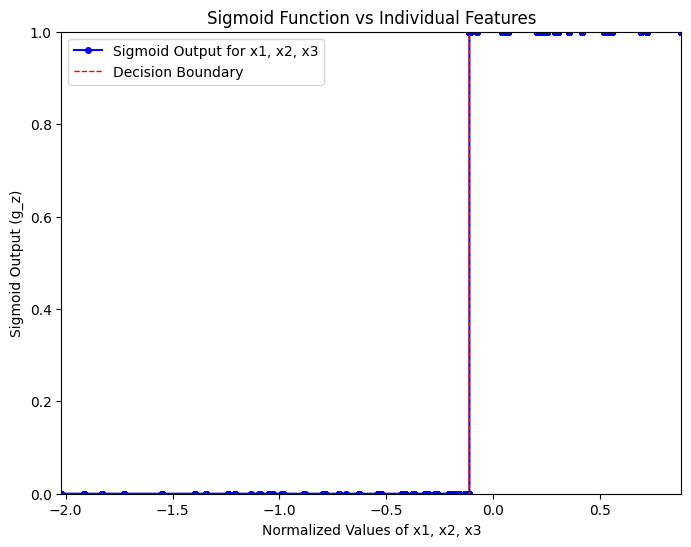

In [72]:
import pandas as pd #import the pandas library
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
mushroom = fetch_ucirepo(id=73) 
  
# data (as pandas dataframes) 
X = mushroom.data.features 
y = mushroom.data.targets 
z = mushroom.targets
  
# metadata 
#print(mushroom.metadata) - I have commented this out because it is not needed for this task
  
# variable information 
#print(mushroom.variables) - I have commented this out because it is not needed for this task    

# 1) Identify the attributes and target variables
#print ("1) Identify the attributes and target variables:")
#print(X) #my attributes [8124 rows x 22 columns]
#print(y) #my target variable [8124 rows x 1 columns]

# 2) Place the target variable column as the last comlumn of your data file
data = pd.DataFrame(data=X, columns=z)
data['poisonous'] = y #use the target variable as the last column by using the data['poisonous'] = y.
#print("2) Place the target variable column as the last column of your data file:")
#print(data)

# 3) Create a function that will split the dataset in any desired proportion when given a data set. i.e. 20% testing, 80% training. Your split must select instances distributed throughout your dataset at random.
def split_data (data, test_size):
	data = data.sample(frac=1)
	train_data = data.iloc[:int(len(data)*(1-test_size))] 
	test_data = data.iloc[int(len(data)*(1-test_size)):]
	return train_data,test_data
train_data,test_data = split_data (data, 0.2)
#print("3) Create a function that will split the dataset in any desired proportion when given a data set. i.e. 20% testing, 80% training. Your split must select instances distributed throughout your dataset at random.")
#print("Training Set:")
#print(train_data)
#print("\nTesting Set:")
#print(test_data)



#4) Perform Logistic Regression on the test data set using the sigmoid function. Optimize for each feature separately. Plot the sigmoid function for each feature.

# Extrapolate the data and because mushrooms is all letters, use a numeric value for a-z as 1-26.  
letter_to_number = {letter: idx + 1 for idx, letter in enumerate(string.ascii_lowercase)}
print(letter_to_number)
# Choose a random 3 sets of variables
x1_test = train_data['cap-shape'].values  # Save x1 values in array x1_train.
x2_test = train_data['population'].values  # Save x2 values in array x2_train.
x3_test= train_data['stalk-color-above-ring'].values  # Save x3 values in array x3_train.
target = np.where(train_data['poisonous'].values == 'p', 1, 0)  # Convert 'p' -> 1 and 'e' -> 0
#verify
print('x1_test', x1_test, 'size:', x1_test.size)
print('x2_test', x2_test, 'size:', x2_test.size)
print('x3_test', x3_test, 'size:', x3_test.size)
print('target', target, 'size:', target.size)
# Convert the letters to numbers
x1_test_numeric = np.array([letter_to_number[letter] for letter in x1_test])
x2_test_numeric = np.array([letter_to_number[letter] for letter in x2_test])
x3_test_numeric = np.array([letter_to_number[letter] for letter in x3_test])
# Print the numeric arrays for verification
print("x1_test (numeric):", x1_test_numeric)
print("x2_test (numeric):", x2_test_numeric)
print("x3_test (numeric):", x3_test_numeric)



# Normalize each feature
x1_numeric_normalized = (x1_test_numeric - np.mean(x1_test_numeric)) / np.std(x1_test_numeric)  # Normalize x1 values. np.mean() is used to calculate the mean of the x1 values and np.std() is used to calculate the standard deviation of the x1 values. the x1 values are then normalized by subtracting the mean and dividing by the standard deviation.
x2_numeric_normalized = (x2_test_numeric - np.mean(x2_test_numeric)) / np.std(x2_test_numeric)  # Normalize x2 values
x3_numeric_normalized = (x3_test_numeric - np.mean(x3_test_numeric)) / np.std(x3_test_numeric)  # Normalize x3 values

normalized_combined = (x1_numeric_normalized + x2_numeric_normalized + x3_numeric_normalized)/3
print("normalized_combined:", x1_numeric_normalized, 'size:', x1_numeric_normalized.size)

#Logistic regression function (optimize for each feature separately)
def logistic_regression(x1_data, x2_data, x3_data, target, iterations=2000, lr=0.01):
    w0 = 0.0  # Initialize weights
    w1 = 0.0
    w2 = 0.0
    w3 = 0.0
    for i in range(iterations):
        # Compute the log-likelihood
        log_likelihood = sum(target * (w0 + w1 * x1_data + (w2**2)*x2_data + (w3**3)*x3_data) - np.log(1 + np.exp(-(w0 + w1 * x1_data + (w2**2)*x2_data + (w3**3)*x3_data))))
        
        # Gradient with respect to w0 and w1
        G0 = sum((target - 1 / (1 + np.exp(-(w0 + w1 * x1_data + (w2**2)*x2_data + (w3**3)*x3_data)))) * 1)   # Gradient with respect to w0
        G1 = sum((target - 1 / (1 + np.exp(-(w0 + w1 * x1_data + (w2**2)*x2_data + (w3**3)*x3_data)))) * x1_data)  # Gradient with respect to w1
        G2 = sum((target - 1 / (1 + np.exp(-(w0 + w1 * x1_data + (w2**2)*x2_data + (w3**3)*x3_data)))) * x2_data)  # Gradient with respect to w2
        G3 = sum((target - 1 / (1 + np.exp(-(w0 + w1 * x1_data + (w2**2)*x2_data + (w3**3)*x3_data)))) * x3_data)  # Gradient with respect to w3
        
        # Update the weights using the learning rate
        w0 += lr * G0  # Update w0
        w1 += lr * G1  # Update w1
        w2 += lr * G2  # Update w2
        w3 += lr * G3  # Update w3

        # Optionally print progress
        if i % 100 == 0:
            print(f"Iteration {i}: Log-Likelihood = {log_likelihood}, w0 = {w0}, w1 = {w1}, w2 = {w2}, w3 = {w3}")

    # Compute the sigmoid function using the optimized weights
    g_z = 1 / (1 + np.exp(-(w0 + w1 * x1_data + (w2**2)*x2_data + (w3**3)*x3_data)))
    return g_z, w0, w1, w2, w3  # Return the sigmoid function and the optimized weights

# Optimize for x1 training data feature separately
g_z_x, w0_x0, w1_x1, w2_x2, w3_x3 = logistic_regression(x1_numeric_normalized, x2_numeric_normalized, x3_numeric_normalized, target) # get g_Z, w0 and w1 for x1_normalized, and the target variables input into logistic regression function

print ("Optimized w0:", w0_x0, 'size:', w0_x1.size)
print ("Optimized w1:", w1_x1, 'size:', w1_x1.size)
print ("Optimized w2:", w2_x2, 'size:', w2_x2.size)
print ("Optimized w3:", w3_x3, 'size:', w3_x3.size)


#----------------------------------------------------------------------------------------------------------------------------
# Plot the sigmoid function for each feature
plt.figure(figsize=(8, 6))

# Plot the sigmoid output for normalized combined features
plt.plot(np.sort(normalized_combined), np.sort(g_z_x), label='Sigmoid Output for x1, x2, x3', color='blue', marker='o', linestyle='-', markersize=4)

# Decision boundary using normalized x1, x2, x3 values
decision_boundary = w0_x0 + w1_x1 * x1_numeric_normalized + (w2_x2**2) * x2_numeric_normalized + (w3_x3**3) * x3_numeric_normalized
print("Decision Boundary:", decision_boundary, 'size:', decision_boundary.size)

# Plot the decision boundary with a smaller line width and limited range
plt.plot(np.sort(normalized_combined), np.sort(decision_boundary), color='red', linestyle='--', linewidth=1, label='Decision Boundary')

# Adding labels and title
plt.xlabel('Normalized Values of x1, x2, x3')
plt.ylabel('Sigmoid Output (g_z)')
plt.title('Sigmoid Function vs Individual Features')

# Adjusting axis limits to prevent overpowering
plt.xlim(min(normalized_combined), max(normalized_combined))
plt.ylim(0, 1)  # Sigmoid output is between 0 and 1, so we limit the y-axis accordingly

plt.legend()

# Show plot
plt.show()



# Test Mushroom Data Logistic Regression

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26}
x1_test ['b' 'x' 'x' ... 'x' 'x' 'k'] size: 1625
x2_test ['s' 'v' 'c' ... 'v' 'n' 'v'] size: 1625
x3_test ['w' 'p' 'w' ... 'w' 'w' 'w'] size: 1625
target [0 1 0 ... 0 0 1] size: 1625
x1_test (numeric): [ 2 24 24 ... 24 24 11]
x2_test (numeric): [19 22  3 ... 22 14 22]
x3_test (numeric): [23 16 23 ... 23 23 23]
Iteration 0: Log-Likelihood = -1126.3641684098636, w0 = -0.49, w1 = 0.6073234799350896, w2 = 4.786295711399809, w3 = -1.647298288086376
Iteration 100: Log-Likelihood = -192996.03088342963, w0 = -12.546520930925114, w1 = 0.05993743507948612, w2 = 11.726537132830071, w3 = -9.012819859364782


C:\Users\yman7\AppData\Local\Temp\ipykernel_21752\702124498.py:85: RuntimeWarning: overflow encountered in exp
  log_likelihood = sum(target * (w0 + w1 * x1_data + (w2**2)*x2_data + (w3**3)*x3_data) - np.log(1 + np.exp(-(w0 + w1 * x1_data + (w2**2)*x2_data + (w3**3)*x3_data))))
C:\Users\yman7\AppData\Local\Temp\ipykernel_21752\702124498.py:88: RuntimeWarning: overflow encountered in exp
  G0 = sum((target - 1 / (1 + np.exp(-(w0 + w1 * x1_data + (w2**2)*x2_data + (w3**3)*x3_data)))) * 1)   # Gradient with respect to w0
C:\Users\yman7\AppData\Local\Temp\ipykernel_21752\702124498.py:89: RuntimeWarning: overflow encountered in exp
  G1 = sum((target - 1 / (1 + np.exp(-(w0 + w1 * x1_data + (w2**2)*x2_data + (w3**3)*x3_data)))) * x1_data)  # Gradient with respect to w1
C:\Users\yman7\AppData\Local\Temp\ipykernel_21752\702124498.py:90: RuntimeWarning: overflow encountered in exp
  G2 = sum((target - 1 / (1 + np.exp(-(w0 + w1 * x1_data + (w2**2)*x2_data + (w3**3)*x3_data)))) * x2_data)  # Grad

Iteration 200: Log-Likelihood = -61494.70377293649, w0 = -23.300905000332584, w1 = 0.6274004785719134, w2 = 7.35811392742702, w3 = -3.3841396292994137
Iteration 300: Log-Likelihood = -75654.48212535414, w0 = -27.202526009605617, w1 = 1.3044598470484958, w2 = 8.242394750889307, w3 = -2.5031883677395257
Iteration 400: Log-Likelihood = -59412.1093015362, w0 = -22.799656995501937, w1 = 3.6413734722819493, w2 = 5.6967699280859305, w3 = 2.2631224921545967
Iteration 500: Log-Likelihood = -inf, w0 = -11.673442276488839, w1 = 0.7697932685517872, w2 = 10.956707768441534, w3 = -8.654993738458174
Iteration 600: Log-Likelihood = -23152.938494525966, w0 = 5.37399575858365, w1 = 2.4074066693133185, w2 = 7.16437316132372, w3 = -0.6554280198283791
Iteration 700: Log-Likelihood = -42216.24372491694, w0 = -10.661384072969597, w1 = 1.217721935880282, w2 = 5.930667184222775, w3 = 3.1054138133073574
Iteration 800: Log-Likelihood = -74325.07002837224, w0 = -31.26524731272634, w1 = 2.4345103253958325, w2 = 6.

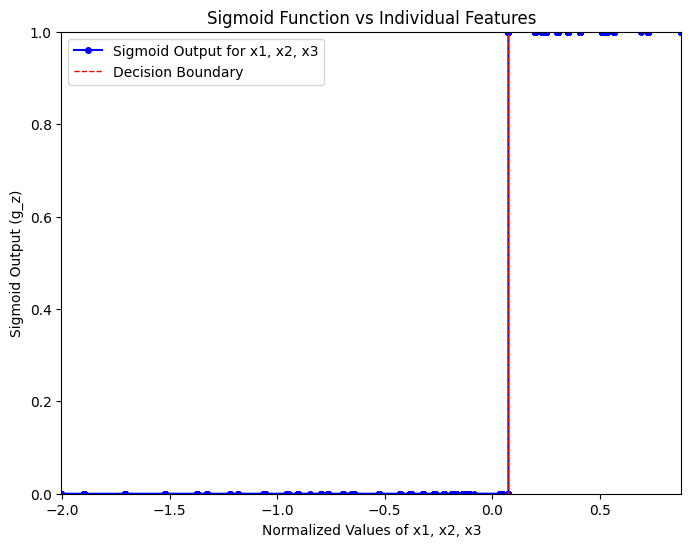

In [73]:
import pandas as pd #import the pandas library
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
mushroom = fetch_ucirepo(id=73) 
  
# data (as pandas dataframes) 
X = mushroom.data.features 
y = mushroom.data.targets 
z = mushroom.targets
  
# metadata 
#print(mushroom.metadata) - I have commented this out because it is not needed for this task
  
# variable information 
#print(mushroom.variables) - I have commented this out because it is not needed for this task    

# 1) Identify the attributes and target variables
#print ("1) Identify the attributes and target variables:")
#print(X) #my attributes [8124 rows x 22 columns]
#print(y) #my target variable [8124 rows x 1 columns]

# 2) Place the target variable column as the last comlumn of your data file
data = pd.DataFrame(data=X, columns=z)
data['poisonous'] = y #use the target variable as the last column by using the data['poisonous'] = y.
#print("2) Place the target variable column as the last column of your data file:")
#print(data)

# 3) Create a function that will split the dataset in any desired proportion when given a data set. i.e. 20% testing, 80% training. Your split must select instances distributed throughout your dataset at random.
def split_data (data, test_size):
	data = data.sample(frac=1)
	train_data = data.iloc[:int(len(data)*(1-test_size))] 
	test_data = data.iloc[int(len(data)*(1-test_size)):]
	return train_data,test_data
train_data,test_data = split_data (data, 0.2)
#print("3) Create a function that will split the dataset in any desired proportion when given a data set. i.e. 20% testing, 80% training. Your split must select instances distributed throughout your dataset at random.")
#print("Training Set:")
#print(train_data)
#print("\nTesting Set:")
#print(test_data)



#4) Perform Logistic Regression on the test data set using the sigmoid function. Optimize for each feature separately. Plot the sigmoid function for each feature.

# Extrapolate the data and because mushrooms is all letters, use a numeric value for a-z as 1-26.  
letter_to_number = {letter: idx + 1 for idx, letter in enumerate(string.ascii_lowercase)}
print(letter_to_number)
# Choose a random 3 sets of variables
x1_test = test_data['cap-shape'].values  # Save x1 values in array x1_train.
x2_test = test_data['population'].values  # Save x2 values in array x2_train.
x3_test= test_data['stalk-color-above-ring'].values  # Save x3 values in array x3_train.
target = np.where(test_data['poisonous'].values == 'p', 1, 0)  # Convert 'p' -> 1 and 'e' -> 0
#verify
print('x1_test', x1_test, 'size:', x1_test.size)
print('x2_test', x2_test, 'size:', x2_test.size)
print('x3_test', x3_test, 'size:', x3_test.size)
print('target', target, 'size:', target.size)
# Convert the letters to numbers
x1_test_numeric = np.array([letter_to_number[letter] for letter in x1_test])
x2_test_numeric = np.array([letter_to_number[letter] for letter in x2_test])
x3_test_numeric = np.array([letter_to_number[letter] for letter in x3_test])
# Print the numeric arrays for verification
print("x1_test (numeric):", x1_test_numeric)
print("x2_test (numeric):", x2_test_numeric)
print("x3_test (numeric):", x3_test_numeric)



# Normalize each feature
x1_numeric_normalized = (x1_test_numeric - np.mean(x1_test_numeric)) / np.std(x1_test_numeric)  # Normalize x1 values. np.mean() is used to calculate the mean of the x1 values and np.std() is used to calculate the standard deviation of the x1 values. the x1 values are then normalized by subtracting the mean and dividing by the standard deviation.
x2_numeric_normalized = (x2_test_numeric - np.mean(x2_test_numeric)) / np.std(x2_test_numeric)  # Normalize x2 values
x3_numeric_normalized = (x3_test_numeric - np.mean(x3_test_numeric)) / np.std(x3_test_numeric)  # Normalize x3 values

normalized_combined = (x1_numeric_normalized + x2_numeric_normalized + x3_numeric_normalized)/3

#Logistic regression function (optimize for each feature separately)
def logistic_regression(x1_data, x2_data, x3_data, target, iterations=3000, lr=0.02):
    w0 = 0.0  # Initialize weights
    w1 = 0.0
    w2 = 0.0
    w3 = 0.0
    for i in range(iterations):
        # Compute the log-likelihood
        log_likelihood = sum(target * (w0 + w1 * x1_data + (w2**2)*x2_data + (w3**3)*x3_data) - np.log(1 + np.exp(-(w0 + w1 * x1_data + (w2**2)*x2_data + (w3**3)*x3_data))))
        
        # Gradient with respect to w0 and w1
        G0 = sum((target - 1 / (1 + np.exp(-(w0 + w1 * x1_data + (w2**2)*x2_data + (w3**3)*x3_data)))) * 1)   # Gradient with respect to w0
        G1 = sum((target - 1 / (1 + np.exp(-(w0 + w1 * x1_data + (w2**2)*x2_data + (w3**3)*x3_data)))) * x1_data)  # Gradient with respect to w1
        G2 = sum((target - 1 / (1 + np.exp(-(w0 + w1 * x1_data + (w2**2)*x2_data + (w3**3)*x3_data)))) * x2_data)  # Gradient with respect to w2
        G3 = sum((target - 1 / (1 + np.exp(-(w0 + w1 * x1_data + (w2**2)*x2_data + (w3**3)*x3_data)))) * x3_data)  # Gradient with respect to w3
        
        # Update the weights using the learning rate
        w0 += lr * G0  # Update w0
        w1 += lr * G1  # Update w1
        w2 += lr * G2  # Update w2
        w3 += lr * G3  # Update w3

        # Optionally print progress
        if i % 100 == 0:
            print(f"Iteration {i}: Log-Likelihood = {log_likelihood}, w0 = {w0}, w1 = {w1}, w2 = {w2}, w3 = {w3}")

    # Compute the sigmoid function using the optimized weights
    g_z = 1 / (1 + np.exp(-(w0 + w1 * x1_data + (w2**2)*x2_data + (w3**3)*x3_data)))
    return g_z, w0, w1, w2, w3  # Return the sigmoid function and the optimized weights

# Optimize for x1 training data feature separately
g_z_x, w0_x0, w1_x1, w2_x2, w3_x3 = logistic_regression(x1_numeric_normalized, x2_numeric_normalized, x3_numeric_normalized, target) # get g_Z, w0 and w1 for x1_normalized, and the target variables input into logistic regression function

print ("Optimized w0:", w0_x0, 'size:', w0_x1.size)
print ("Optimized w1:", w1_x1, 'size:', w1_x1.size)
print ("Optimized w2:", w2_x2, 'size:', w2_x2.size)
print ("Optimized w3:", w3_x3, 'size:', w3_x3.size)

#----------------------------------------------------------------------------------------------------------------------------
# Plot the sigmoid function for each feature
plt.figure(figsize=(8, 6))

# Plot the sigmoid output for normalized combined features
plt.plot(np.sort(normalized_combined), np.sort(g_z_x), label='Sigmoid Output for x1, x2, x3', color='blue', marker='o', linestyle='-', markersize=4)

# Decision boundary using normalized x1, x2, x3 values
decision_boundary = w0_x0 + w1_x1 * x1_numeric_normalized + (w2_x2**2) * x2_numeric_normalized + (w3_x3**3) * x3_numeric_normalized
print("Decision Boundary:", decision_boundary, 'size:', decision_boundary.size)

# Plot the decision boundary with a smaller line width and limited range
plt.plot(np.sort(normalized_combined), np.sort(decision_boundary), color='red', linestyle='--', linewidth=1, label='Decision Boundary')

# Adding labels and title
plt.xlabel('Normalized Values of x1, x2, x3')
plt.ylabel('Sigmoid Output (g_z)')
plt.title('Sigmoid Function vs Individual Features')

# Adjusting axis limits to prevent overpowering
plt.xlim(min(normalized_combined), max(normalized_combined))
plt.ylim(0, 1)  # Sigmoid output is between 0 and 1, so we limit the y-axis accordingly

plt.legend()

# Show plot
plt.show()

# Letter Recognition 

# Train Data Letter Recognition Linear Regression

x1_test [ 8 15  5 ...  4  0 10] size: 16000
target [39 43 47 ... 50 30 37] size: 16000
x1_normalized [-2.13115967 -2.13115967 -2.13115967 ...  2.41418301  2.41418301
  2.41418301] size: 16000
target_normalized [ 1.66088627  1.66088627  1.66088627 ... -1.66644291 -1.66644291
 -1.66644291] size: 16000
972.1015461002271
Iteration 0: y_guess:[-0.11311597 -0.11311597 -0.11311597 ...  0.3414183   0.3414183
  0.3414183 ], w0:-0.05999999999999078, w1:-1.6210154610027068
374.60270269829846
Iteration 1: y_guess:[ 3.39464278  3.39464278  3.39464278 ... -3.97342799 -3.97342799
 -3.97342799], w0:0.03599999999999315, w1:-0.5884061844009449
159.50311907358426
Iteration 2: y_guess:[ 1.28998753  1.28998753  1.28998753 ... -1.38452021 -1.38452021
 -1.38452021], w0:-0.021599999999972988, w1:-1.207971750362059
82.06726896860322
Iteration 3: y_guess:[ 2.55278068  2.55278068  2.55278068 ... -2.93786488 -2.93786488
 -2.93786488], w0:0.012959999999980223, w1:-0.836232410785448
54.1903629308206
Iteration 4: y_

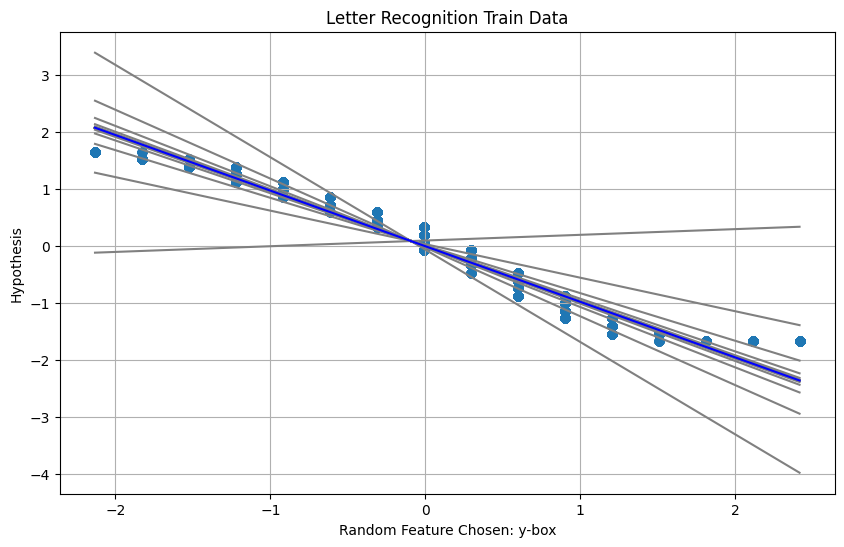

In [3]:
import pandas as pd #import the pandas library
from ucimlrepo import fetch_ucirepo
import string

# fetch dataset 
letter_recognition = fetch_ucirepo(id=59) 
  
# data (as pandas dataframes) 
X = letter_recognition.data.features 
y = letter_recognition.data.targets 
z = letter_recognition.targets
  
# metadata 
#print(letter_recognition.metadata) - I removed as it is not needed for this task
  
# variable information 
#print(letter_recognition.variables) - I removed as it is not needed for this task


# 1) Identify the attributes and target variables
#print ("1) Identify the attributes and target variables:")
#print(X) #my attributes [20000 rows x 16 columns]
#print(y) #my target variable (lettr) [20000 rows x 1 columns]

#2) Place the target variable column as the last comlumn of your data file
data = pd.DataFrame (data = X, columns = z) #create a data frame with the data and the columns. data = X is the data that will be used to create the data frame. columns = z is the columns that will be used to create the data frame.
data['lettr'] = y #use the target variable as the last column by using the data['lettr'] = y.
#print("2) Place the target variable column as the last column of your data file:") #
#print(data)

#3) Create a function that will split the dataset in any desired proportion when given a data set. i.e. 20% testing, 80% training. Your split must select instances distributed throughout your dataset at random.
def split_data (data, test_size): #define the function split_data with the parameters data and test_size that will be used to split the data. data is the dataset and test_size is the proportion of the data that will be used for testing.
    data = data.sample(frac=1) #shuffle the data. frac=1 means that the entire data set will be shuffled. data.sample() is used to shuffle the data by using the frac parameter. the frac parameter is used to specify the fraction of the data that will be returned.
    train_data = data.iloc[:int(len(data)*(1-test_size))] #train_data is the training data set. data.iloc[] is used to select the data from the data set. data.iloc[:int(len(data)*(1-test_size))] is used to select the data from the beginning of the data set to the end of the data set multiplied by 1 minus the test_size.
    test_data = data.iloc[int(len(data)*(1-test_size)):] #test_data is the testing data set. data.iloc[] is used to select the data from the data set. data.iloc[int(len(data)*(1-test_size)):] is used to select the data from the end of the data set multiplied by 1 minus the test_size to the end of the data set. .iloc[:int(len(data)*(1-test_size))] is used to select the data from the beginning of the data set to the end of the data set multiplied by 1 minus the test_size.
    return train_data,test_data #return the training and testing data sets. this will return the training and testing data sets that were created in the previous two lines. we are returning the training and testing data sets so that we can use them later on in the code.
train_data,test_data = split_data (data, 0.2) #call the split_data function with the data set and the test_size as the parameters. the test_size is 0.2 which means that 20% of the data will be used for testing and 80% of the data will be used for training. the training and testing data sets will be stored in the variables train_data and test_data.

#print("3) Create a function that will split the dataset in any desired proportion when given a data set. i.e. 20% testing, 80% training. Your split must select instances distributed throughout your dataset at random.")
#print("Training Set:")
#print(train_data)
#print("\nTesting Set:")
#print(test_data)

#4) Linear Regression 
#there are 16000 instances in training data and 4000 instances in testing data, therefore, N_train = instances 1 to 16000, N_test = instances 1 to 4000
#I am chosing 4 random features of my liking D = Features 1 to 4

# Extrapolate the data and because mushrooms is all letters, use a numeric value for a-z as 1-26.  
letter_to_number = {letter: idx + 1 for idx, letter in enumerate(string.ascii_letters)}
x1_test = train_data['y-box'].values  # Save x1 values in array x1_train.
target_data = train_data['lettr'].values  # Save target values in array target_train.
target = np.array([letter_to_number[letter] for letter in target_data]) # Convert the letters to numbers. Lower case a-z is 1-26, Upper case A-Z is 27-52

print('x1_test', x1_test, 'size:', x1_test.size)
print('target', target, 'size:', target.size)

# Normalize each feature
x1_normalized = np.sort((x1_test - np.mean(x1_test)) / np.std(x1_test))  # Normalize x1 values. np.mean() is used to calculate the mean of the x1 values and np.std() is used to calculate the standard deviation of the x1 values. the x1 values are then normalized by subtracting the mean and dividing by the standard deviation.
target_normalized = np.sort((target - np.mean(target)) / np.std(target))[::-1]  # Normalize target values
print('x1_normalized', x1_normalized, 'size:', x1_normalized.size)
print('target_normalized', target_normalized, 'size:', target_normalized.size)

epsilon = 0.1


plt.figure(figsize=(10, 6))  # Set figure size for better visualization

def linear_regression(x1_data, targets, iterations=100, lr=0.0001):
    w0 = 0.1
    w1 = 0.1

    for i in range(iterations):
        yguess = w0 + w1*x1_normalized
        error = (sum((target_normalized - yguess)**2))/2 # cost function
        print(error*epsilon)
        plt.plot(x1_normalized,yguess, color='grey')

        G0 = sum(yguess - target_normalized) # Gradient with respect to w0
        G1 = sum(x1_normalized*(yguess - target_normalized)) # Gradient with respect to w1
        w0 = w0 - lr * G0
        w1 = w1 - lr * G1
       
        print(f"Iteration {i}: y_guess:{yguess}, w0:{w0}, w1:{w1}")
    y_guess = w0 + w1*x1_data 
    return y_guess, w0, w1

y_guess_new, w0_x0, w1_x1 = linear_regression(x1_normalized, target_normalized)
print('y_guess_new', y_guess_new, 'size:', y_guess_new.size)
print('w0_x0', w0_x0, 'size:', w0_x0.size)
print('w1_x1', w1_x1, 'size:', w1_x1.size)


#----------------------------------------------------------------------------------------------------
#plt.figure(figsize=(10, 6))  # Set figure size for better visualization
plt.title('Letter Recognition Train Data')
plt.xlabel('Random Feature Chosen: y-box')
plt.ylabel('Hypothesis')
plt.plot(np.sort(x1_normalized),y_guess_new, color='blue')
plt.scatter(np.sort(x1_normalized), target_normalized)
plt.grid()
plt.show()



# Test Data Letter Recognition Linear Regression

x1_test [ 6  4 11 ...  4 10 10] size: 4000
target [41 27 49 ... 51 50 44] size: 4000
x1_normalized [-2.06486712 -2.06486712 -2.06486712 ...  2.39103948  2.39103948
  2.39103948] size: 4000
target_normalized [ 1.64306438  1.64306438  1.64306438 ... -1.67773351 -1.67773351
 -1.67773351] size: 4000
243.04889910166014
Iteration 0: y_guess:[-0.10648671 -0.10648671 -0.10648671 ...  0.33910395  0.33910395
  0.33910395], w0:0.05999999999999698, w1:-0.33048899101658247
93.51228199248051
Iteration 1: y_guess:[ 0.74241585  0.74241585  0.74241585 ... -0.73021223 -0.73021223
 -0.73021223], w0:0.035999999999998644, w1:-0.5887823856265264
39.6790998331769
Iteration 2: y_guess:[ 1.25175739  1.25175739  1.25175739 ... -1.37180193 -1.37180193
 -1.37180193], w0:0.02159999999999849, w1:-0.7437584223924985
20.299154255826554
Iteration 3: y_guess:[ 1.55736231  1.55736231  1.55736231 ... -1.75675575 -1.75675575
 -1.75675575], w0:0.01295999999999963, w1:-0.8367440444520762
13.322373847981106
Iteration 4: y_gu

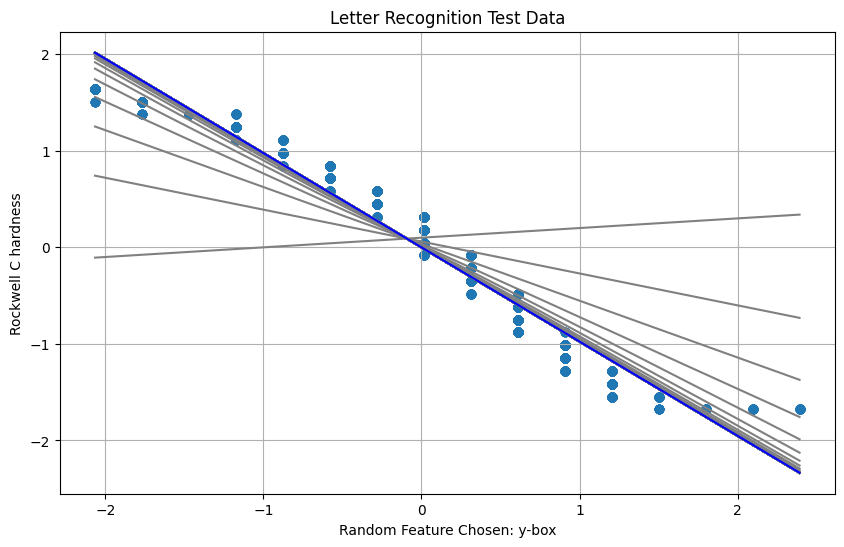

In [12]:
import pandas as pd #import the pandas library
from ucimlrepo import fetch_ucirepo
import string

# fetch dataset 
letter_recognition = fetch_ucirepo(id=59) 
  
# data (as pandas dataframes) 
X = letter_recognition.data.features 
y = letter_recognition.data.targets 
z = letter_recognition.targets
  
# metadata 
#print(letter_recognition.metadata) - I removed as it is not needed for this task
  
# variable information 
#print(letter_recognition.variables) - I removed as it is not needed for this task


# 1) Identify the attributes and target variables
#print ("1) Identify the attributes and target variables:")
#print(X) #my attributes [20000 rows x 16 columns]
#print(y) #my target variable (lettr) [20000 rows x 1 columns]

#2) Place the target variable column as the last comlumn of your data file
data = pd.DataFrame (data = X, columns = z) #create a data frame with the data and the columns. data = X is the data that will be used to create the data frame. columns = z is the columns that will be used to create the data frame.
data['lettr'] = y #use the target variable as the last column by using the data['lettr'] = y.
#print("2) Place the target variable column as the last column of your data file:") #
#print(data)

#3) Create a function that will split the dataset in any desired proportion when given a data set. i.e. 20% testing, 80% training. Your split must select instances distributed throughout your dataset at random.
def split_data (data, test_size): #define the function split_data with the parameters data and test_size that will be used to split the data. data is the dataset and test_size is the proportion of the data that will be used for testing.
    data = data.sample(frac=1) #shuffle the data. frac=1 means that the entire data set will be shuffled. data.sample() is used to shuffle the data by using the frac parameter. the frac parameter is used to specify the fraction of the data that will be returned.
    train_data = data.iloc[:int(len(data)*(1-test_size))] #train_data is the training data set. data.iloc[] is used to select the data from the data set. data.iloc[:int(len(data)*(1-test_size))] is used to select the data from the beginning of the data set to the end of the data set multiplied by 1 minus the test_size.
    test_data = data.iloc[int(len(data)*(1-test_size)):] #test_data is the testing data set. data.iloc[] is used to select the data from the data set. data.iloc[int(len(data)*(1-test_size)):] is used to select the data from the end of the data set multiplied by 1 minus the test_size to the end of the data set. .iloc[:int(len(data)*(1-test_size))] is used to select the data from the beginning of the data set to the end of the data set multiplied by 1 minus the test_size.
    return train_data,test_data #return the training and testing data sets. this will return the training and testing data sets that were created in the previous two lines. we are returning the training and testing data sets so that we can use them later on in the code.
train_data,test_data = split_data (data, 0.2) #call the split_data function with the data set and the test_size as the parameters. the test_size is 0.2 which means that 20% of the data will be used for testing and 80% of the data will be used for training. the training and testing data sets will be stored in the variables train_data and test_data.

#print("3) Create a function that will split the dataset in any desired proportion when given a data set. i.e. 20% testing, 80% training. Your split must select instances distributed throughout your dataset at random.")
#print("Training Set:")
#print(train_data)
#print("\nTesting Set:")
#print(test_data)

#4) Linear Regression 
#there are 16000 instances in training data and 4000 instances in testing data, therefore, N_train = instances 1 to 16000, N_test = instances 1 to 4000
#I am chosing 4 random features of my liking D = Features 1 to 4

# Extrapolate the data and because mushrooms is all letters, use a numeric value for a-z as 1-26.  
letter_to_number = {letter: idx + 1 for idx, letter in enumerate(string.ascii_letters)}
x1_test = test_data['y-box'].values  # Save x1 values in array x1_train.
target_data = test_data['lettr'].values  # Save target values in array target_train.
target = np.array([letter_to_number[letter] for letter in target_data]) # Convert the letters to numbers. Lower case a-z is 1-26, Upper case A-Z is 27-52

print('x1_test', x1_test, 'size:', x1_test.size)
print('target', target, 'size:', target.size)

# Normalize each feature
x1_normalized = np.sort((x1_test - np.mean(x1_test)) / np.std(x1_test))  # Normalize x1 values. np.mean() is used to calculate the mean of the x1 values and np.std() is used to calculate the standard deviation of the x1 values. the x1 values are then normalized by subtracting the mean and dividing by the standard deviation.
target_normalized = np.sort((target - np.mean(target)) / np.std(target))[::-1]  # Normalize target values
print('x1_normalized', x1_normalized, 'size:', x1_normalized.size)
print('target_normalized', target_normalized, 'size:', target_normalized.size)

epsilon = 0.1


plt.figure(figsize=(10, 6))  # Set figure size for better visualization

def linear_regression(x1_data, targets, iterations=100, lr=0.0001):
    w0 = 0.1
    w1 = 0.1

    for i in range(iterations):
        yguess = w0 + w1*x1_normalized
        error = (sum((target_normalized - yguess)**2))/2 # cost function
        print(error*epsilon)
        plt.plot(x1_normalized,yguess, color='grey')

        G0 = sum(yguess - target_normalized) # Gradient with respect to w0
        G1 = sum(x1_normalized*(yguess - target_normalized)) # Gradient with respect to w1
        w0 = w0 - lr * G0
        w1 = w1 - lr * G1
       
        print(f"Iteration {i}: y_guess:{yguess}, w0:{w0}, w1:{w1}")
    y_guess = w0 + w1*x1_data 
    return y_guess, w0, w1

y_guess_new, w0_x0, w1_x1 = linear_regression(x1_normalized, target_normalized)
print('y_guess_new', y_guess_new, 'size:', y_guess_new.size)
print('w0_x0', w0_x0, 'size:', w0_x0.size)
print('w1_x1', w1_x1, 'size:', w1_x1.size)


#----------------------------------------------------------------------------------------------------
#plt.figure(figsize=(10, 6))  # Set figure size for better visualization
plt.title('Letter Recognition Test Data')
plt.xlabel('Random Feature Chosen: y-box')
plt.ylabel('Hypothesis')
plt.plot(np.sort(x1_normalized),y_guess_new, color='blue')
plt.scatter(np.sort(x1_normalized), target_normalized)
plt.grid()
plt.show()


# Ecoli

In [75]:
import pandas as pd #import the pandas library
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
ecoli = fetch_ucirepo(id=39) 
  
# data (as pandas dataframes) 
X = ecoli.data.features 
y = ecoli.data.targets 
z = ecoli.targets
  
# metadata 
#print(ecoli.metadata) - I commented this out because it is not needed for this task
  
# variable information 
#print(ecoli.variables) - I commented this out because it is not needed for this task

# 1) Identify the attributes and target variables
print ("1) Identify the attributes and target variables:")
print (X) #my attributes [336 rows x 7 columns]
print (y) #my target variable (class) [336 rows x 1 columns]

#2) Place the target variable column as the last comlumn of your data file 
data = pd.DataFrame (data = X, columns = z)
data['class'] = y
print ("2) Place the target variable column as the last column of your data file:")
print (data)

#3) Create a function that will split the dataset in any desired proportion when given a data set. i.e. 20% testing, 80% training. Your split must select instances distributed throughout your dataset at random.
def split_data (data, test_size):
    data = data.sample(frac=1)
    train_data = data.iloc[:int(len(data)*(1-test_size))]
    test_data = data.iloc[int(len(data)*(1-test_size)):]
    return train_data,test_data
train_data,test_data = split_data (data, 0.2)
print ("3) Create a function that will split the dataset in any desired proportion when given a data set. i.e. 20% testing, 80% training. Your split must select instances distributed throughout your dataset at random.")
print ("Training Set:")
print (train_data)
print ("\nTesting Set:")
print (test_data)



1) Identify the attributes and target variables:
      mcg   gvh   lip  chg   aac  alm1  alm2
0    0.49  0.29  0.48  0.5  0.56  0.24  0.35
1    0.07  0.40  0.48  0.5  0.54  0.35  0.44
2    0.56  0.40  0.48  0.5  0.49  0.37  0.46
3    0.59  0.49  0.48  0.5  0.52  0.45  0.36
4    0.23  0.32  0.48  0.5  0.55  0.25  0.35
..    ...   ...   ...  ...   ...   ...   ...
331  0.74  0.56  0.48  0.5  0.47  0.68  0.30
332  0.71  0.57  0.48  0.5  0.48  0.35  0.32
333  0.61  0.60  0.48  0.5  0.44  0.39  0.38
334  0.59  0.61  0.48  0.5  0.42  0.42  0.37
335  0.74  0.74  0.48  0.5  0.31  0.53  0.52

[336 rows x 7 columns]
    class
0      cp
1      cp
2      cp
3      cp
4      cp
..    ...
331    pp
332    pp
333    pp
334    pp
335    pp

[336 rows x 1 columns]
2) Place the target variable column as the last column of your data file:
      mcg   gvh   lip  chg   aac  alm1  alm2 class
0    0.49  0.29  0.48  0.5  0.56  0.24  0.35    cp
1    0.07  0.40  0.48  0.5  0.54  0.35  0.44    cp
2    0.56  0.40 

# Ecoli Train Data Linear Regression

      mcg   gvh   lip  chg   aac  alm1  alm2 class
88   0.50  0.51  0.48  0.5  0.27  0.23  0.34    cp
76   0.48  0.42  0.48  0.5  0.45  0.25  0.35    cp
31   0.34  0.33  0.48  0.5  0.38  0.35  0.44    cp
139  0.22  0.34  0.48  0.5  0.42  0.29  0.39    cp
106  0.44  0.49  0.48  0.5  0.39  0.38  0.40    cp
..    ...   ...   ...  ...   ...   ...   ...   ...
249  0.81  0.52  0.48  0.5  0.57  0.78  0.80   imU
189  0.61  0.52  0.48  0.5  0.54  0.67  0.52    im
3    0.59  0.49  0.48  0.5  0.52  0.45  0.36    cp
171  0.74  0.44  0.48  0.5  0.55  0.88  0.89    im
30   0.53  0.38  0.48  0.5  0.44  0.26  0.36    cp

[268 rows x 8 columns]
x1_test [0.23 0.25 0.35 0.29 0.38 0.78 0.28 0.47 0.19 0.16 0.2  0.37 0.78 0.7
 0.31 0.78 0.82 0.73 0.46 0.59 0.7  0.45 0.44 0.24 0.54 0.72 0.81 0.67
 0.39 0.3  0.75 0.4  0.16 0.64 0.42 0.05 0.66 0.8  0.51 0.5  0.85 0.38
 0.37 0.53 0.33 0.44 0.22 0.53 0.79 0.35 0.26 0.75 0.65 0.62 0.4  0.76
 0.76 0.32 0.47 0.39 0.42 0.33 0.51 0.57 0.36 0.9  0.25 0.34 0.76 0.26
 0

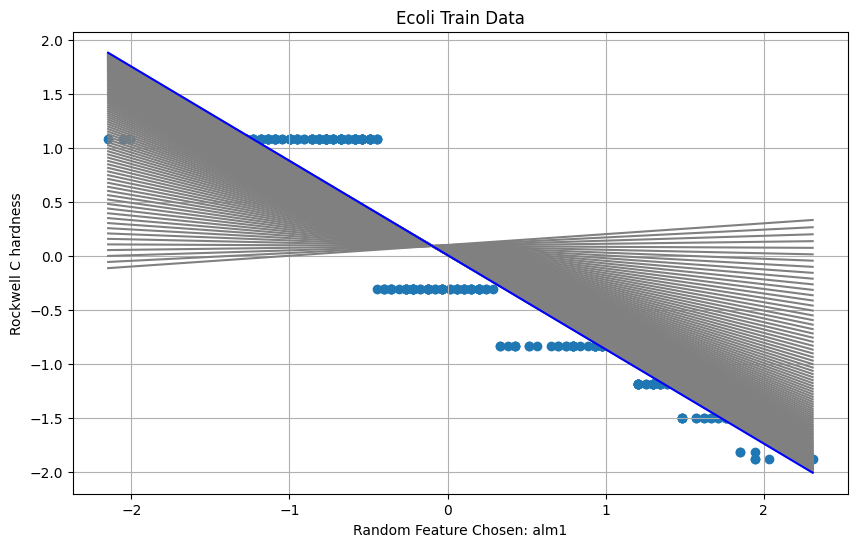

In [13]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 
import numpy as np
import math
import matplotlib.pyplot as plt
import string
  
# fetch dataset 
ecoli = fetch_ucirepo(id=39) 
  
# data (as pandas dataframes) 
X = ecoli.data.features 
y = ecoli.data.targets 
z = ecoli.targets
  
# metadata 
#print(ecoli.metadata) - I commented this out because it is not needed for this task
  
# variable information 
#print(ecoli.variables) - I commented this out because it is not needed for this task

# 1) Identify the attributes and target variables
#print ("1) Identify the attributes and target variables:")
#print (X) #my attributes [336 rows x 7 columns]
#print (y) #my target variable (class) [336 rows x 1 columns]

#2) Place the target variable column as the last comlumn of your data file 
data = pd.DataFrame (data = X, columns = z)
data['class'] = y
#print ("2) Place the target variable column as the last column of your data file:")
#print (data)

#3) Create a function that will split the dataset in any desired proportion when given a data set. i.e. 20% testing, 80% training. Your split must select instances distributed throughout your dataset at random.
def split_data (data, test_size):
    data = data.sample(frac=1)
    train_data = data.iloc[:int(len(data)*(1-test_size))]
    test_data = data.iloc[int(len(data)*(1-test_size)):]
    return train_data,test_data
train_data,test_data = split_data (data, 0.2)
#print ("3) Create a function that will split the dataset in any desired proportion when given a data set. i.e. 20% testing, 80% training. Your split must select instances distributed throughout your dataset at random.")
#print ("Training Set:")
print (train_data)
#print ("\nTesting Set:")
#print (test_data)

#4) Linear Regression 

class_mapping = {
    "cp": 143,
    "im": 77,
    "pp": 52,
    "imU": 35,
    "om": 20,
    "omL": 5,
    "imL": 2,
    "imS": 2
}

x1_test = train_data['alm1'].values  # Save x1 values in array x1_train.
train_data['class'] = train_data['class'].map(class_mapping)
target_data = train_data['class'].values  # Save target values in array target_train.

print('x1_test', x1_test, 'size:', x1_test.size)
print('target', target_data, 'size:', target_data.size)

# Normalize each feature
x1_normalized = np.sort((x1_test - np.mean(x1_test)) / np.std(x1_test))  # Normalize x1 values. np.mean() is used to calculate the mean of the x1 values and np.std() is used to calculate the standard deviation of the x1 values. the x1 values are then normalized by subtracting the mean and dividing by the standard deviation.
target_normalized = np.sort((target_data - np.mean(target_data)) / np.std(target_data))[::-1]  # Normalize target values
print('x1_normalized', x1_normalized, 'size:', x1_normalized.size)
print('target_normalized', target_normalized, 'size:', target_normalized.size)

epsilon = 0.1


plt.figure(figsize=(10, 6))  # Set figure size for better visualization

def linear_regression(x1_data, targets, iterations=100, lr=0.0001):
    w0 = 0.1
    w1 = 0.1

    for i in range(iterations):
        yguess = w0 + w1*x1_normalized
        error = (sum((target_normalized - yguess)**2))/2 # cost function
        print(error*epsilon)
        plt.plot(x1_normalized,yguess, color='grey')

        G0 = sum(yguess - target_normalized) # Gradient with respect to w0
        G1 = sum(x1_normalized*(yguess - target_normalized)) # Gradient with respect to w1
        w0 = w0 - lr * G0
        w1 = w1 - lr * G1
       
        print(f"Iteration {i}: y_guess:{yguess}, w0:{w0}, w1:{w1}")
    y_guess = w0 + w1*x1_data 
    return y_guess, w0, w1

y_guess_new, w0_x0, w1_x1 = linear_regression(x1_normalized, target_normalized)
print('y_guess_new', y_guess_new, 'size:', y_guess_new.size)
print('w0_x0', w0_x0, 'size:', w0_x0.size)
print('w1_x1', w1_x1, 'size:', w1_x1.size)


#----------------------------------------------------------------------------------------------------
#plt.figure(figsize=(10, 6))  # Set figure size for better visualization
plt.title('Ecoli Train Data')
plt.xlabel('Random Feature Chosen: alm1')
plt.ylabel('Hypothesis')
plt.plot(np.sort(x1_normalized),y_guess_new, color='blue')
plt.scatter(np.sort(x1_normalized), target_normalized)
plt.grid()
plt.show()

# Ecoli Test Data Linear Regression

      mcg   gvh   lip  chg   aac  alm1  alm2 class
258  0.78  0.44  0.48  0.5  0.45  0.73  0.68   imU
102  0.38  0.26  0.48  0.5  0.54  0.16  0.28    cp
268  0.74  0.78  0.48  0.5  0.75  0.54  0.15    om
194  0.58  0.34  0.48  0.5  0.56  0.87  0.81    im
255  0.86  0.55  0.48  0.5  0.63  0.81  0.83   imU
..    ...   ...   ...  ...   ...   ...   ...   ...
125  0.34  0.51  0.48  0.5  0.44  0.37  0.46    cp
97   0.57  0.54  0.48  0.5  0.37  0.28  0.33    cp
278  0.68  0.63  0.48  0.5  0.73  0.40  0.30    om
82   0.29  0.47  0.48  0.5  0.41  0.23  0.34    cp
298  0.64  0.72  0.48  0.5  0.49  0.42  0.19    pp

[268 rows x 8 columns]
x1_test [0.22 0.41 0.42 0.25 0.4  0.8  0.31 0.45 0.73 0.72 0.03 0.24 0.88 0.92
 0.79 0.34 0.49 0.47 0.78 0.42 0.55 0.33 0.67 0.26 0.3  0.49 0.87 0.86
 0.14 0.26 0.34 0.79 0.39 0.65 0.88 0.38 0.25 0.36 0.78 0.71 0.18 0.23
 0.41 0.56 0.49 0.37 0.65 0.76 0.91 0.76 0.06 0.2  0.47 0.45 0.18 0.79
 0.42 0.52 0.28 0.86 0.53 0.77 0.49 0.45 0.24 0.25 0.77 0.38] size: 68
t

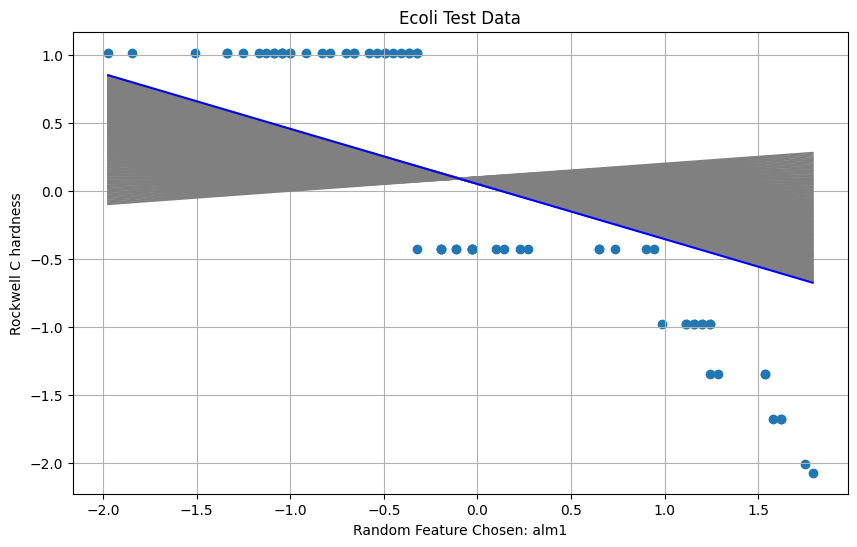

In [19]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 
import numpy as np
import math
import matplotlib.pyplot as plt
import string
  
# fetch dataset 
ecoli = fetch_ucirepo(id=39) 
  
# data (as pandas dataframes) 
X = ecoli.data.features 
y = ecoli.data.targets 
z = ecoli.targets
  
# metadata 
#print(ecoli.metadata) - I commented this out because it is not needed for this task
  
# variable information 
#print(ecoli.variables) - I commented this out because it is not needed for this task

# 1) Identify the attributes and target variables
#print ("1) Identify the attributes and target variables:")
#print (X) #my attributes [336 rows x 7 columns]
#print (y) #my target variable (class) [336 rows x 1 columns]

#2) Place the target variable column as the last comlumn of your data file 
data = pd.DataFrame (data = X, columns = z)
data['class'] = y
#print ("2) Place the target variable column as the last column of your data file:")
#print (data)

#3) Create a function that will split the dataset in any desired proportion when given a data set. i.e. 20% testing, 80% training. Your split must select instances distributed throughout your dataset at random.
def split_data (data, test_size):
    data = data.sample(frac=1)
    train_data = data.iloc[:int(len(data)*(1-test_size))]
    test_data = data.iloc[int(len(data)*(1-test_size)):]
    return train_data,test_data
train_data,test_data = split_data (data, 0.2)
#print ("3) Create a function that will split the dataset in any desired proportion when given a data set. i.e. 20% testing, 80% training. Your split must select instances distributed throughout your dataset at random.")
#print ("Training Set:")
print (train_data)
#print ("\nTesting Set:")
#print (test_data)

#4) Linear Regression 

class_mapping = {
    "cp": 143,
    "im": 77,
    "pp": 52,
    "imU": 35,
    "om": 20,
    "omL": 5,
    "imL": 2,
    "imS": 2
}

x1_test = test_data['alm1'].values  # Save x1 values in array x1_train.
test_data['class'] = test_data['class'].map(class_mapping)
target_data = test_data['class'].values  # Save target values in array target_train.

print('x1_test', x1_test, 'size:', x1_test.size)
print('target', target_data, 'size:', target_data.size)

# Normalize each feature
x1_normalized = np.sort((x1_test - np.mean(x1_test)) / np.std(x1_test))  # Normalize x1 values. np.mean() is used to calculate the mean of the x1 values and np.std() is used to calculate the standard deviation of the x1 values. the x1 values are then normalized by subtracting the mean and dividing by the standard deviation.
target_normalized = np.sort((target_data - np.mean(target_data)) / np.std(target_data))[::-1]  # Normalize target values
print('x1_normalized', x1_normalized, 'size:', x1_normalized.size)
print('target_normalized', target_normalized, 'size:', target_normalized.size)

epsilon = 0.1


plt.figure(figsize=(10, 6))  # Set figure size for better visualization

def linear_regression(x1_data, targets, iterations=100, lr=0.0001):
    w0 = 0.1
    w1 = 0.1

    for i in range(iterations):
        yguess = w0 + w1*x1_normalized
        error = (sum((target_normalized - yguess)**2))/2 # cost function
        print(error*epsilon)
        plt.plot(x1_normalized,yguess, color='grey')

        G0 = sum(yguess - target_normalized) # Gradient with respect to w0
        G1 = sum(x1_normalized*(yguess - target_normalized)) # Gradient with respect to w1
        w0 = w0 - lr * G0
        w1 = w1 - lr * G1
       
        print(f"Iteration {i}: y_guess:{yguess}, w0:{w0}, w1:{w1}")
    y_guess = w0 + w1*x1_data 
    return y_guess, w0, w1

y_guess_new, w0_x0, w1_x1 = linear_regression(x1_normalized, target_normalized)
print('y_guess_new', y_guess_new, 'size:', y_guess_new.size)
print('w0_x0', w0_x0, 'size:', w0_x0.size)
print('w1_x1', w1_x1, 'size:', w1_x1.size)


#----------------------------------------------------------------------------------------------------
#plt.figure(figsize=(10, 6))  # Set figure size for better visualization
plt.title('Ecoli Test Data')
plt.xlabel('Random Feature Chosen: alm1')
plt.ylabel('Hypothesis')
plt.plot(np.sort(x1_normalized),y_guess_new, color='blue')
plt.scatter(np.sort(x1_normalized), target_normalized)
plt.grid()
plt.show()

# Robot Execution Failures


In [76]:
import pandas as pd #import the pandas library

#read dataset LP1.csv, LP2.csv, LP3.csv, LP4.csv, and LP5.csv and store them in a single data set
#I converted the data files to csv files so that I can read them using the pd.read_csv() function
data = pd.concat([pd.read_csv('LP1.csv'), pd.read_csv('LP2.csv'), pd.read_csv('LP3.csv'), pd.read_csv('LP4.csv'), pd.read_csv('LP5.csv')], ignore_index=True) #concatenate the data files LP1.csv, LP2.csv, LP3.csv, LP4.csv, and LP5.csv and store the result in the variable data. ignore_index=True is used to ignore the index of the data files and create a new index for the concatenated data set.
#print (data) #print the combined data set. Total [8319 rows x 8 columns] 


# 1) Identify the attributes and target variables
print("1) Identify the attributes and target variables:")
print(data['normal'].value_counts()) #print the count of each value in the 'normal' column of the data set. Also prints the column names of the data set.

# 2) Place column one as the last column of your data file
print("\n2) Place column one as the last column of your data file:")
data = data[[data.columns[1]] + data.columns.tolist()[2:] + [data.columns[0]]]  # Rearrange columns
data.columns = ['Fx', 'Fy', 'Fz', 'Tx', 'Ty', 'Tz', data.columns[6], data.columns[7]]
print(data)
#print(data.iloc[500:901]) - I used this to check the data at different points as the entire data set is too large to print at once.

# 3) Create a function that will split the dataset in any desired proportion when given a data set. i.e. 20% testing, 80% training. Your split must select instances distributed throughout your dataset at random.
def split_data(data, test_size): #define the function split_data with the parameters data and test_size that will be used to split the data. data is the dataset and test_size is the proportion of the data that will be used for testing.
    data = data.sample(frac=1) #shuffle the data. frac=1 means that the entire data set will be shuffled. data.sample() is used to shuffle the data by using the frac parameter. the frac parameter is used to specify the fraction of the data that will be returned.
    train_data = data.iloc[:int(len(data)*(1-test_size))] #train_data is the training data set. data.iloc[] is used to select the data from the data set. data.iloc[:int(len(data)*(1-test_size))] is used to select the data from the beginning of the data set to the end of the data set multiplied by 1 minus the test_size.
    test_data = data.iloc[int(len(data)*(1-test_size)):] #test_data is the testing data set. data.iloc[] is used to select the data from the data set. data.iloc[int(len(data)*(1-test_size)):] is used to select the data from the end of the data set multiplied by 1 minus the test_size to the end of the data set. .iloc[:int(len(data)*(1-test_size))] is used to select the data from the beginning of the data set to the end of the data set multiplied by 1 minus the test_size.
    return train_data, test_data #return the training and testing data sets. this will return the training and testing data sets that were created in the previous two lines. we are returning the training and testing data sets so that we can use them later on in the code.

train_data, test_data = split_data(data, 0.2) #call the split_data function with the data set and the test_size as the parameters. the test_size is 0.2 which means that 20% of the data will be used for testing and 80% of the data will be used for training. the training and testing data sets will be stored in the variables train_data and test_data.
print("3) Create a function that will split the dataset in any desired proportion when given a data set. i.e. 20% testing, 80% training. Your split must select instances distributed throughout your dataset at random.")
print("Training Set:")
print(train_data)
print("\nTesting Set:")
print(test_data)





1) Identify the attributes and target variables:
normal
normal                105
collision              89
obstruction            55
collision_in_part      47
bottom_collision       26
collision_in_tool      26
bottom_obstruction     21
fr_collision           16
left_col                9
back_col                7
front_col               6
right_col               5
Name: count, dtype: int64

2) Place column one as the last column of your data file:
       Fx   Fy    Fz   Tx   Ty   Tz   ok normal
0    -1.0 -1.0  63.0 -3.0 -1.0  0.0  NaN    NaN
1     0.0  0.0  62.0 -3.0 -1.0  0.0  NaN    NaN
2    -1.0 -1.0  61.0 -3.0  0.0  0.0  NaN    NaN
3    -1.0 -1.0  63.0 -2.0 -1.0  0.0  NaN    NaN
4    -1.0 -1.0  63.0 -3.0 -1.0  0.0  NaN    NaN
...   ...  ...   ...  ...  ...  ...  ...    ...
8314  1.0  1.0   8.0  0.0  3.0 -4.0  NaN    NaN
8315  0.0  0.0   5.0  0.0  3.0 -4.0  NaN    NaN
8316 -1.0  1.0  -3.0 -3.0 -2.0 -3.0  NaN    NaN
8317  0.0 -1.0  -5.0 -1.0  1.0 -3.0  NaN    NaN
8318 -1.0  1.0   4.

# NO LOG/LIN REGRESSION FOR DATA SET 5 ROBOTIC FAILURE